In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.set(style="whitegrid")

In [3]:
df = pd.read_csv('Car_Insurance_Claim.csv')

In [5]:
df.head(5)

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  str    
 2   GENDER               10000 non-null  str    
 3   RACE                 10000 non-null  str    
 4   DRIVING_EXPERIENCE   10000 non-null  str    
 5   EDUCATION            10000 non-null  str    
 6   INCOME               10000 non-null  str    
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  str    
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  str    
 15  SPEEDING_VIOLATIONS  10000 non-null  int64  
 16

<h1>TIPOS DE DADOS</h1>

ID = número de ID  
AGE = idade em faixas etárias (16-25, 26-39, 40-64, 65+), variável ordinal mas tratada como string.  
GENDER = gênero, masculino ou feminino, variável nominal  
RACE = pertence à maioria de raças ou alguma minoria, variável nominal binária  
DRIVING_EXPERIENCE = anos de experiência dirigindo (0-9y, 10-19y, 20-29y, 30y+), variável ordinal também tratada como string.  
EDUCATION = nível de educação formal (none, high school, university), variável ordinal também tratada como string.  
INCOME = classe social (poverty, working class, middle class, upper class), variável ordinal também tratada como string.  
CREDIT_SCORE = score de crédito (0,05 - 0,96), variável de intervalo  
VEHICLE_OWNERSHIP = flag binária, tratada como float, 0 = não possui carro 1 = possui um ou mais carros  
VEHICLE_YEAR = ano do veículo, antes de 2015 ou depois de 2015, variável ordinal binária  
MARRIED = flag binária, tratada como float, 1 = casado, 0 = solteiro  
CHILDREN = flag binária, 1 = tem filhos 0 = não tem filhos  
POSTAL_CODE = cep dos estados unidos, variável nominal  
ANNUAL_MILEAGE = uso anual do veículo, (2000 - 22000), variável de intervalo  
VEHICLE_TYPE = tipo do carro, sedan ou sports car, variável nominal  
SPEEDING_VIOLATIONS = quantidade de multas de velocidade, (0 - 22), variável de contagem  
DUIS = Driving Under the Influence, quantidade de penalidades por dirigir sob efeito de alcool e/ou drogas, (0 - 6), variável de contagem  
PAST_ACCIDENTS = quantidade de acidentes passados, (0 - 15), variável de contagem  
OUTCOME = flag binária que indica se houve sinistro, 1 = sim 0 = não

In [7]:
missing = df.isna().mean().sort_values(ascending=False)
missing

CREDIT_SCORE           0.0982
ANNUAL_MILEAGE         0.0957
ID                     0.0000
GENDER                 0.0000
AGE                    0.0000
EDUCATION              0.0000
RACE                   0.0000
INCOME                 0.0000
VEHICLE_OWNERSHIP      0.0000
VEHICLE_YEAR           0.0000
DRIVING_EXPERIENCE     0.0000
MARRIED                0.0000
CHILDREN               0.0000
POSTAL_CODE            0.0000
VEHICLE_TYPE           0.0000
SPEEDING_VIOLATIONS    0.0000
DUIS                   0.0000
PAST_ACCIDENTS         0.0000
OUTCOME                0.0000
dtype: float64

CREDIT_SCORE = 9,82% de valores faltando  
ANNUAL_MILEAGE = 9,57% de valores faltando

In [8]:
df['CREDIT_SCORE_missing'] = df['CREDIT_SCORE'].isna().astype(int)
df.groupby('CREDIT_SCORE_missing')['OUTCOME'].mean()

CREDIT_SCORE_missing
0    0.313706
1    0.309572
Name: OUTCOME, dtype: float64

CREDIT_SCORE MISSING  
  
A taxa de sinistro entre clientes com score ausente (≈30,96%) é muito próxima da taxa entre clientes com score informado (≈31,37%), não indicando diferença relevante em análise descritiva simples.

In [9]:
df['ANNUAL_MILEAGE_missing'] = df['ANNUAL_MILEAGE'].isna().astype(int)
df.groupby('ANNUAL_MILEAGE_missing')['OUTCOME'].mean()

ANNUAL_MILEAGE_missing
0    0.310738
1    0.337513
Name: OUTCOME, dtype: float64

ANNUAL_MILEAGE MISSING  
  
A taxa de sinistro entre clientes com a quilometragem anual ausente (≈33,75%) é ligeiramente maior que a taxa de sinistro entre clientes com uso anual do veículo informado (≈31,07%). A ausência da quilometragem anual pode carregar um sinal de risco. Pode ser necessário categorizar "Unknown" ou realizar um input de dados + flag de missing.

In [10]:
df.duplicated().sum()
df['ID'].duplicated().sum()

np.int64(0)

DUPLICADOS  
  
Nenhum ID duplicado na base.

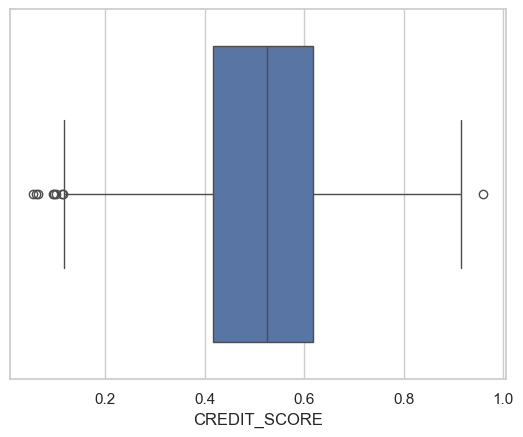

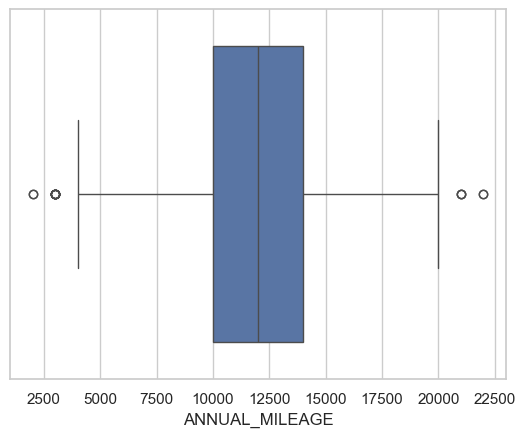

In [11]:
sns.boxplot(x=df['CREDIT_SCORE'])
plt.show()

sns.boxplot(x=df['ANNUAL_MILEAGE'])
plt.show()

OUTLIERS

Na análise de outliers do CREDIT_SCORE, observa-se uma distribuição concentrada aproximadamente entre 0,4 e 0,6, com mediana em torno de 0,55.
Há presença de valores extremos baixos (≈0,1) e altos (≈0,95); contudo, por se tratar de uma variável naturalmente limitada entre 0 e 1, esses valores representam perfis reais de clientes com crédito muito ruim ou excelente.
Assim, não há indícios de erro ou distorção nos dados, e os outliers foram preservados.  

Na análise de outliers do ANNUAL_MILEAGE, observa-se uma distribuição relativamente simétrica, com mediana em torno de 12000 km/ano.
Há valores extremos baixos (≈2500 km/ano) e altos (≈22000 km/ano). Do ponto de vista de negócio, esses outliers são plausíveis, pois podem representar motoristas ocasionais ou motoristas intensivos, como aqueles que utilizam o veículo para trabalho ou longas viagens.
Portanto, tais valores refletem heterogeneidade real de uso, relevante para análise de risco, e foram mantidos.  

Em suma, nenhum tratamento de remoção ou winsorização foi aplicado nesta etapa da análise.

In [12]:
df['OUTCOME'].value_counts(normalize=True)

OUTCOME
0.0    0.6867
1.0    0.3133
Name: proportion, dtype: float64

BALANCEAMENTO DE CLASSES  

A variável alvo apresenta distribuição moderadamente desbalanceada, com aproximadamente 31,33% de sinistros e 68,67% de não sinistros.
Esse nível de desbalanceamento é comum em bases de seguros e não compromete análises exploratórias, mas deve ser considerado em etapas posteriores de modelagem.

<center><h1>ESTRATÉGIAS DE TRATAMENTO</h1></center>
  
| Variável            | Problema | Estratégia                | Justificativa                   |
| ------------------- | -------- | ------------------------- | ------------------------------- |
| CREDIT_SCORE        | Missing  | Criar categoria "Unknown" | Missing pode ser sinal de risco |
| CREDIT_SCORE        | Outliers | Manter                    | Limites naturais                |
| ANNUAL_MILEAGE      | Missing  | Imputar mediana por grupo | Evita viés extremo              |
| AGE                 | Ordinal  | Mapear                    | Relação monotônica com risco    |
| SPEEDING_VIOLATIONS | Contagem | Manter                    | Valores plausíveis              |

As estratégias acima foram definidas e documentadas nesta etapa da EDA, porém a aplicação efetiva do tratamento será realizada em etapas posteriores, conforme a necessidade das análises.

In [13]:
age_map = {'16-25':1, '26-39':2, '40-64':3, '65+':4}
df['AGE_ord'] = df['AGE'].map(age_map)

driving_experience_map = {'0-9y':1, '10-19y':2, '20-29y':3, '30y+':4}    
df['DRIVING_EXPERIENCE_ord'] = df['DRIVING_EXPERIENCE'].map(driving_experience_map)

income_map = {'poverty':1, 'working class':2, 'middle class':3, 'upper class':4} 
df['INCOME_ord'] = df['INCOME'].map(income_map)

education_map = {'none':1, 'high school':2, 'university':3}  
df['EDUCATION_ord'] = df['EDUCATION'].map(education_map)

vehicle_year_map = {'before 2015':1, 'after 2015':2}
df['VEHICLE_YEAR_ord'] = df['VEHICLE_YEAR'].map(vehicle_year_map)

CONVERSÃO ORDINAL  

A conversão ordinal foi realizada para variáveis categóricas com ordenação natural, com o objetivo de preservar a hierarquia entre categorias e facilitar análises exploratórias, visualizações e etapas futuras de modelagem.

<h1>KPIs</h1>  

In [30]:
total_clientes = df.shape[0]
total_sinistros = df['OUTCOME'].sum()
taxa_sinistro = df['OUTCOME'].mean()
taxa_sinistro = taxa_sinistro * 100

In [33]:
print(f"Total de clientes: {total_clientes}")  
print(f"Total de sinistros: {total_sinistros:.0f}")  
print(f"Taxa de sinistro: {taxa_sinistro:.2f}%")

Total de clientes: 10000
Total de sinistros: 3133
Taxa de sinistro: 31.33%


<h1>SEGMENTAÇÃO DE RISCO</h1>

In [58]:
def taxa_sinistro(df, col):
    return (
        df.groupby(col)
          .agg(
              taxa_sinistro=('OUTCOME','mean'),
              volume=('OUTCOME','count')
          )
          .sort_values('taxa_sinistro', ascending=False)
    )

def barplot_risco(df, col, order=None, title=None):
    plt.figure(figsize=(8,4))
    sns.barplot(
        data=df,
        x=col,
        y='OUTCOME',
        estimator=np.mean,
        order=order
    )
    plt.ylabel('Taxa de Sinistro')
    plt.xlabel(col)
    plt.title(title if title else f'Taxa de Sinistro por {col}')
    plt.show()

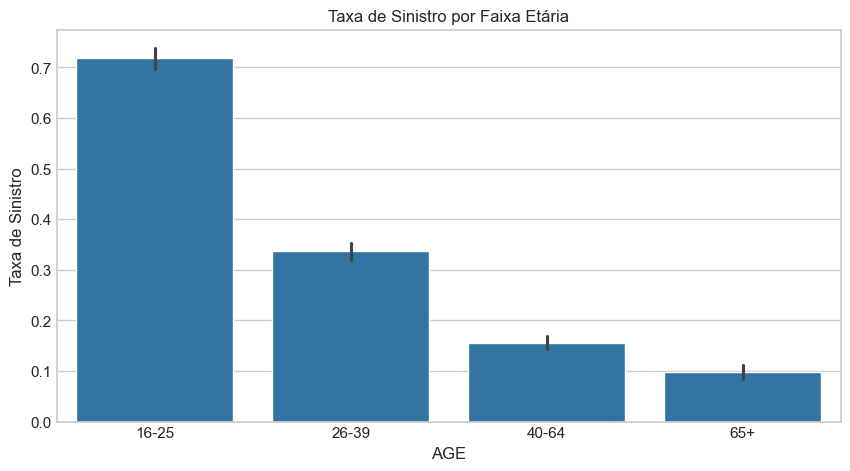

Observa-se uma relação monotônica decrescente entre idade e taxa de sinistro, com motoristas de 16–25 anos apresentando risco significativamente superior à média.


In [143]:
taxa_sinistro(df, 'AGE')
barplot_risco(
    df,
    col='AGE',
    order=['16-25', '26-39', '40-64', '65+'],
    title='Taxa de Sinistro por Faixa Etária'
)

print("Observa-se uma relação monotônica decrescente entre idade e taxa de sinistro, com motoristas de 16–25 anos apresentando risco significativamente superior à média.")

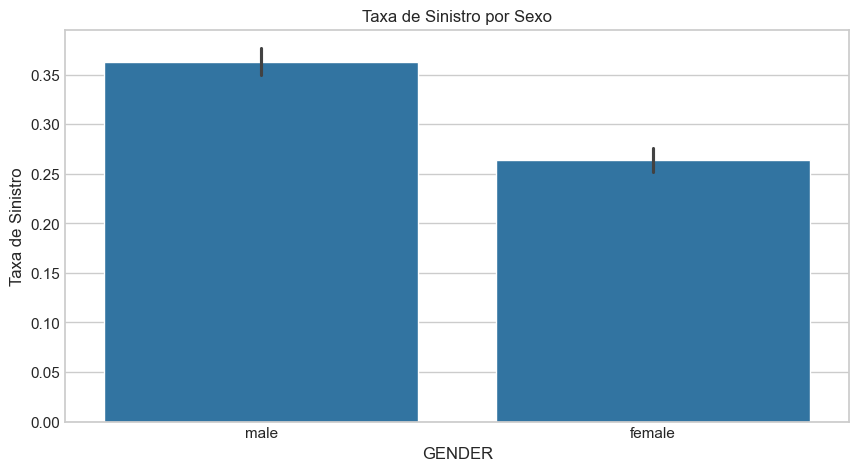

Observa-se que motoristas do sexo masculino apresentam taxa de sinistro superior à das motoristas do sexo feminino. Esse comportamento é consistente com evidências da literatura atuarial, que associam maior propensão ao risco entre condutores homens.


In [111]:
taxa_sinistro(df, 'GENDER')

barplot_risco(
    df,
    col='GENDER',
    order=['male', 'female'],
    title='Taxa de Sinistro por Sexo'
)

print("Observa-se que motoristas do sexo masculino apresentam taxa de sinistro superior à das motoristas do sexo feminino. Esse comportamento é consistente com evidências da literatura atuarial, que associam maior propensão ao risco entre condutores homens.")

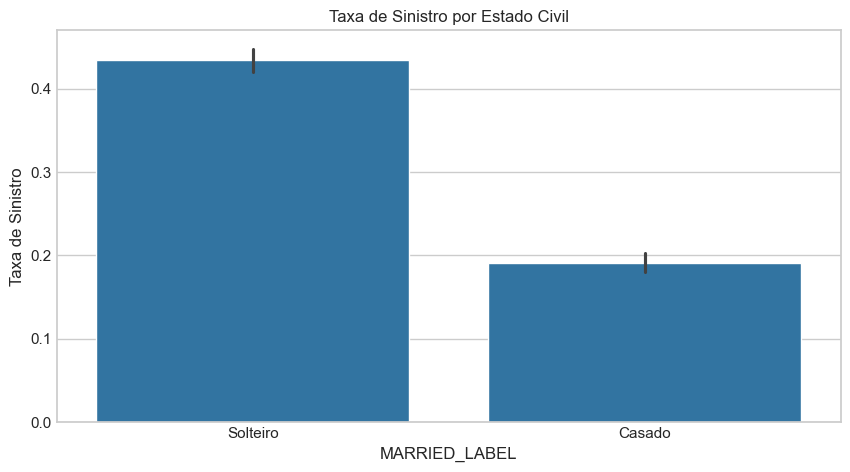

Clientes solteiros apresentam taxa de sinistro significativamente maior em comparação aos clientes casados. O resultado sugere que o estado civil pode capturar diferenças comportamentais relevantes relacionadas à aversão ao risco e responsabilidade.


In [112]:
df['MARRIED_LABEL'] = df['MARRIED'].map({
    1.0: 'Casado',
    0.0: 'Solteiro'
})

taxa_sinistro(df, 'MARRIED_LABEL')

barplot_risco(
    df,
    col='MARRIED_LABEL',
    order=['Solteiro', 'Casado'],
    title='Taxa de Sinistro por Estado Civil'
)

print("Clientes solteiros apresentam taxa de sinistro significativamente maior em comparação aos clientes casados. O resultado sugere que o estado civil pode capturar diferenças comportamentais relevantes relacionadas à aversão ao risco e responsabilidade.")

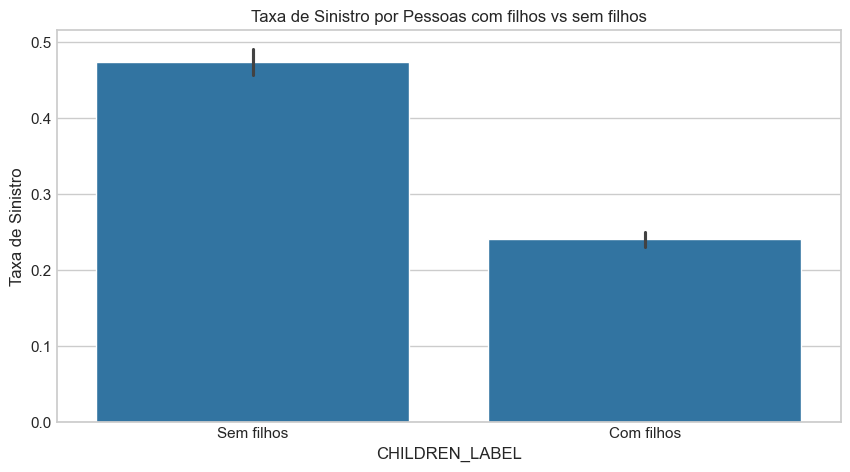

Indivíduos sem filhos apresentam taxa de sinistro consideravelmente superior àqueles com filhos. Esse padrão indica que a presença de dependentes pode estar associada a comportamentos mais cautelosos no trânsito.


In [113]:
df['CHILDREN_LABEL'] = df['CHILDREN'].map({
    1.0: 'Com filhos',
    0.0: 'Sem filhos'
})

taxa_sinistro(df, 'CHILDREN_LABEL')

barplot_risco(
    df,
    col='CHILDREN_LABEL',
    order=['Sem filhos', 'Com filhos'],
    title='Taxa de Sinistro por Pessoas com filhos vs sem filhos'
)

print("Indivíduos sem filhos apresentam taxa de sinistro consideravelmente superior àqueles com filhos. Esse padrão indica que a presença de dependentes pode estar associada a comportamentos mais cautelosos no trânsito.")

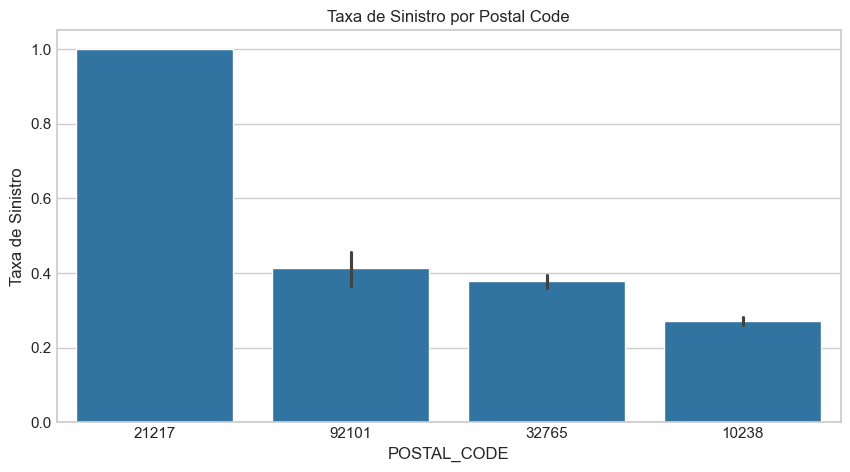

Observa-se elevada heterogeneidade na taxa de sinistro entre diferentes códigos postais, com destaque para regiões específicas apresentando risco extremo. Esse resultado sugere forte influência de fatores geográficos, como densidade urbana, perfil socioeconômico e condições de tráfego, devendo ser tratado com cautela em modelagem para evitar overfitting.


In [114]:
taxa_sinistro(df, 'POSTAL_CODE')

barplot_risco(
    df,
    col='POSTAL_CODE',
    order=['21217', '92101', '32765', '10238'],
    title='Taxa de Sinistro por Postal Code'
)

print("Observa-se elevada heterogeneidade na taxa de sinistro entre diferentes códigos postais, com destaque para regiões específicas apresentando risco extremo. Esse resultado sugere forte influência de fatores geográficos, como densidade urbana, perfil socioeconômico e condições de tráfego, devendo ser tratado com cautela em modelagem para evitar overfitting.")

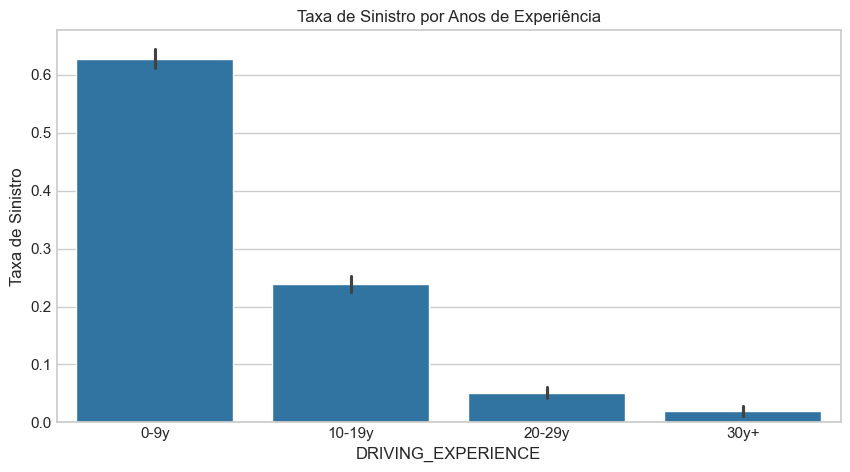

Observa-se uma forte relação monotônica decrescente entre anos de experiência e taxa de sinistro, com condutores entre 0–9 anos de habilitação concentrando risco elevado, e queda acentuada da sinistralidade à medida que a experiência aumenta.


In [108]:
taxa_sinistro(df, 'DRIVING_EXPERIENCE')

barplot_risco(
    df,
    col='DRIVING_EXPERIENCE',
    order=['0-9y', '10-19y', '20-29y', '30y+'],
    title='Taxa de Sinistro por Anos de Experiência'
)

print("Observa-se uma forte relação monotônica decrescente entre anos de experiência e taxa de sinistro, com condutores entre 0–9 anos de habilitação concentrando risco elevado, e queda acentuada da sinistralidade à medida que a experiência aumenta.")

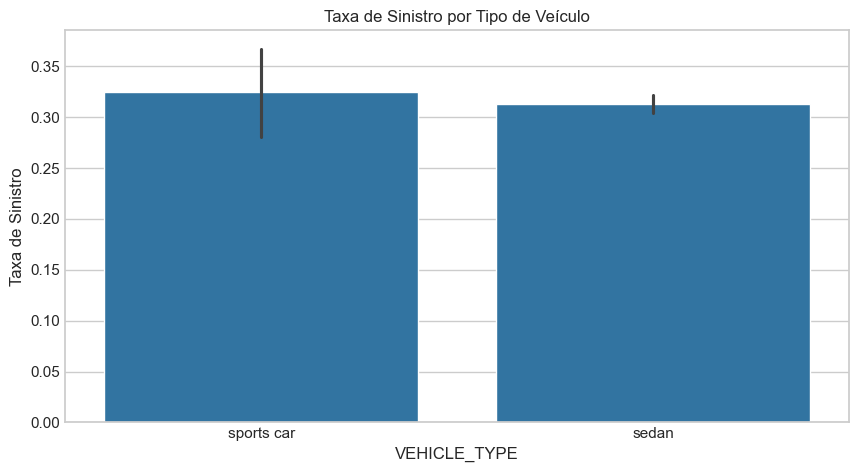

Observa-se diferença moderada na taxa de sinistro por tipo de veículo, com veículos classificados como sports car apresentando sinistralidade ligeiramente superior aos sedans, sugerindo associação com maior exposição ao risco.


In [109]:
taxa_sinistro(df, 'VEHICLE_TYPE')


barplot_risco(
    df,
    col='VEHICLE_TYPE',
    order=['sports car', 'sedan'],
    title='Taxa de Sinistro por Tipo de Veículo'
)

print("Observa-se diferença moderada na taxa de sinistro por tipo de veículo, com veículos classificados como sports car apresentando sinistralidade ligeiramente superior aos sedans, sugerindo associação com maior exposição ao risco.")

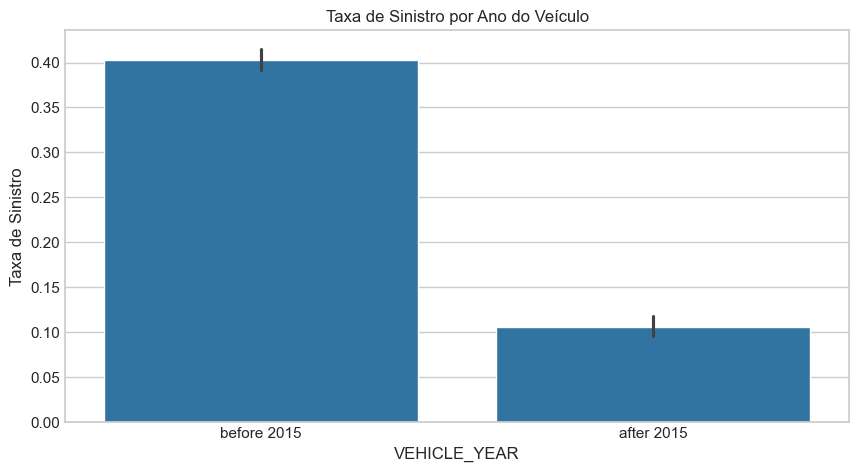

Observa-se taxa de sinistro significativamente maior em veículos fabricados antes de 2015, enquanto veículos mais recentes apresentam redução expressiva de risco, possivelmente associada a avanços tecnológicos e itens de segurança.


In [110]:
taxa_sinistro(df, 'VEHICLE_YEAR')


barplot_risco(
    df,
    col='VEHICLE_YEAR',
    order=['before 2015', 'after 2015'],
    title='Taxa de Sinistro por Ano do Veículo'
)

print("Observa-se taxa de sinistro significativamente maior em veículos fabricados antes de 2015, enquanto veículos mais recentes apresentam redução expressiva de risco, possivelmente associada a avanços tecnológicos e itens de segurança.")

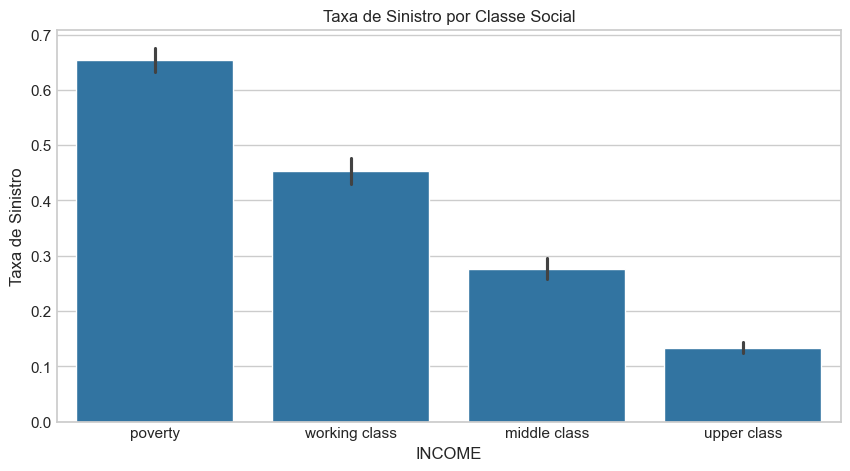

Existe uma relação monotônica decrescente entre classe social e taxa de sinistro. Indivíduos em situação de pobreza apresentam risco elevado, enquanto classes mais altas apresentam taxas substancialmente menores, possivelmente refletindo melhor acesso a veículos mais seguros, menor exposição ao risco e maior educação no trânsito.


In [119]:
taxa_sinistro(df, 'INCOME')

barplot_risco(
    df,
    col='INCOME',
    order=['poverty', 'working class', 'middle class', 'upper class'],
    title='Taxa de Sinistro por Classe Social'
)

print("Existe uma relação monotônica decrescente entre classe social e taxa de sinistro. Indivíduos em situação de pobreza apresentam risco elevado, enquanto classes mais altas apresentam taxas substancialmente menores, possivelmente refletindo melhor acesso a veículos mais seguros, menor exposição ao risco e maior educação no trânsito.")

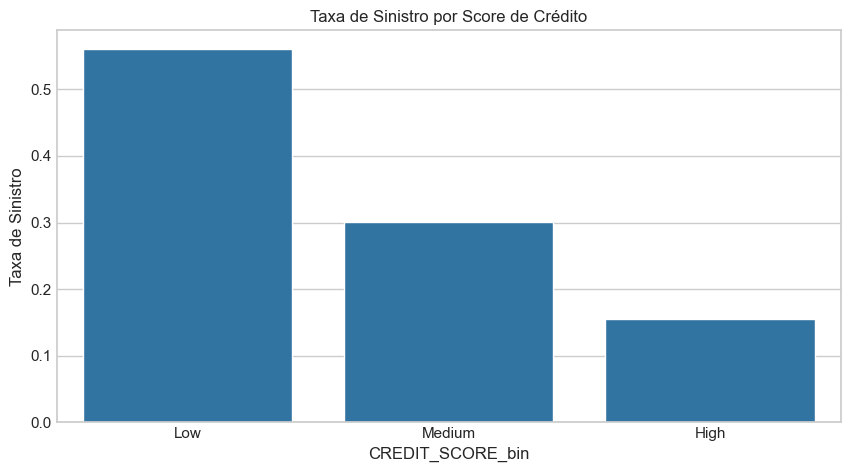

Observa-se relação inversa clara entre score de crédito e taxa de sinistro. Clientes com scores mais baixos concentram maior risco, enquanto indivíduos com scores elevados apresentam taxas reduzidas, reforçando o uso do crédito como proxy comportamental e de responsabilidade financeira.


In [193]:
df['CREDIT_SCORE_bin'] = pd.cut(
    df['CREDIT_SCORE'],
    bins=[0, 0.4, 0.6, 1],
    labels=['Low', 'Medium', 'High']
)
taxa_sinistro(df, 'CREDIT_SCORE_bin')

credit_score_bin_risco = taxa_sinistro(df, 'CREDIT_SCORE_bin').reset_index()

plt.figure(figsize=(8,4))
sns.barplot(
    data=credit_score_bin_risco,
    x='CREDIT_SCORE_bin',
    y='taxa_sinistro'
)

plt.ylabel('Taxa de Sinistro')
plt.xlabel('CREDIT_SCORE_bin')
plt.title('Taxa de Sinistro por Score de Crédito')
plt.show()

print("Observa-se relação inversa clara entre score de crédito e taxa de sinistro. Clientes com scores mais baixos concentram maior risco, enquanto indivíduos com scores elevados apresentam taxas reduzidas, reforçando o uso do crédito como proxy comportamental e de responsabilidade financeira.")

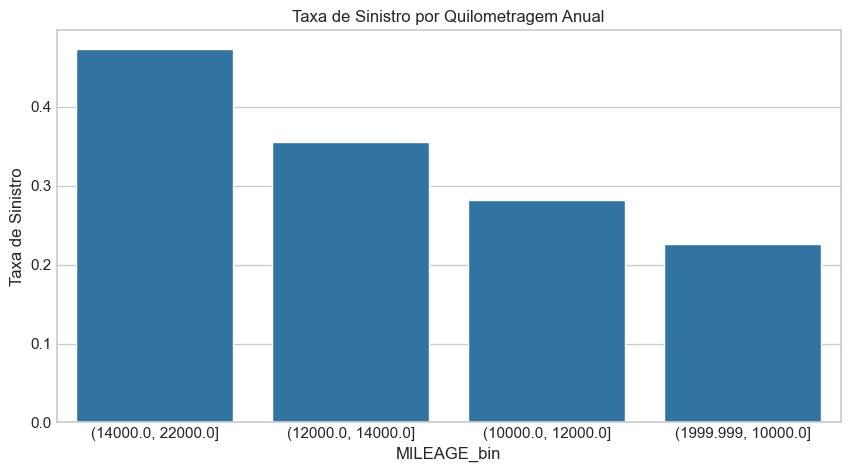

Há relação monotônica crescente entre quilometragem anual e taxa de sinistro. Motoristas que percorrem maiores distâncias estão mais expostos ao risco simplesmente pelo maior tempo de circulação, aumentando a probabilidade de ocorrência de sinistros.


In [131]:
df['MILEAGE_bin'] = pd.qcut(df['ANNUAL_MILEAGE'], 4)
df['MILEAGE_bin'] = pd.Categorical(
    df['MILEAGE_bin'],
    categories=df['MILEAGE_bin'].cat.categories[::-1],
    ordered=True
)
taxa_sinistro(df, 'MILEAGE_bin')

mileage_bin_risco = taxa_sinistro(df, 'MILEAGE_bin').reset_index()

plt.figure(figsize=(8,4))
sns.barplot(
    data=mileage_bin_risco,
    x='MILEAGE_bin',
    y='taxa_sinistro'
)

plt.ylabel('Taxa de Sinistro')
plt.xlabel('MILEAGE_bin')
plt.title('Taxa de Sinistro por Quilometragem Anual')
plt.show()

print("Há relação monotônica crescente entre quilometragem anual e taxa de sinistro. Motoristas que percorrem maiores distâncias estão mais expostos ao risco simplesmente pelo maior tempo de circulação, aumentando a probabilidade de ocorrência de sinistros.")

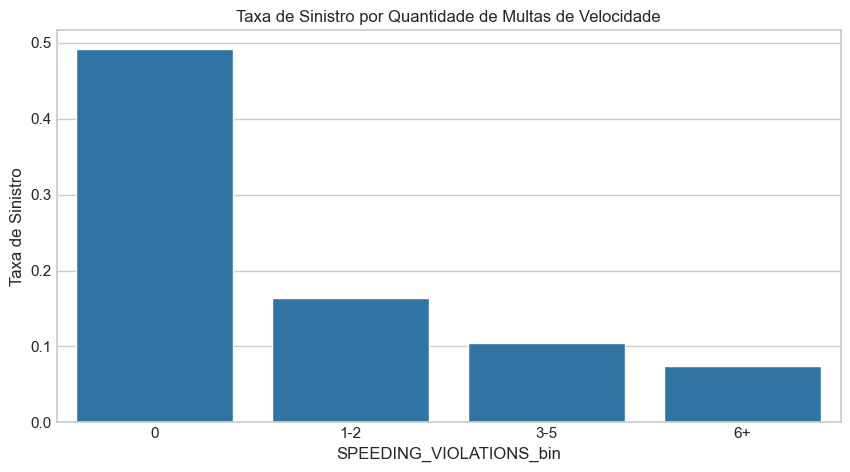

Diferentemente do esperado, o maior risco de sinistro está concentrado no grupo sem multas registradas, com redução progressiva da taxa conforme aumenta o número de multas. Esse comportamento pode indicar viés de seleção, subnotificação, ou efeito de comportamento pós-penalidade, onde motoristas multados tornam-se mais cautelosos, exigindo análise adicional antes de uso direto na precificação.


In [125]:
bins = [-1, 0, 2, 5, df['SPEEDING_VIOLATIONS'].max()]
labels = ['0', '1-2', '3-5', '6+']

df['SPEEDING_VIOLATIONS_bin'] = pd.cut(
    df['SPEEDING_VIOLATIONS'],
    bins=bins,
    labels=labels
)

taxa_sinistro(df, 'SPEEDING_VIOLATIONS_bin')

speeding_tickets_bin_risco = taxa_sinistro(df, 'SPEEDING_VIOLATIONS_bin').reset_index()

plt.figure(figsize=(8,4))
sns.barplot(
    data=speeding_tickets_bin_risco,
    x='SPEEDING_VIOLATIONS_bin',
    y='taxa_sinistro'
)

plt.ylabel('Taxa de Sinistro')
plt.xlabel('SPEEDING_VIOLATIONS_bin')
plt.title('Taxa de Sinistro por Quantidade de Multas de Velocidade')
plt.show()

print("Diferentemente do esperado, o maior risco de sinistro está concentrado no grupo sem multas registradas, com redução progressiva da taxa conforme aumenta o número de multas. Esse comportamento pode indicar viés de seleção, subnotificação, ou efeito de comportamento pós-penalidade, onde motoristas multados tornam-se mais cautelosos, exigindo análise adicional antes de uso direto na precificação.")

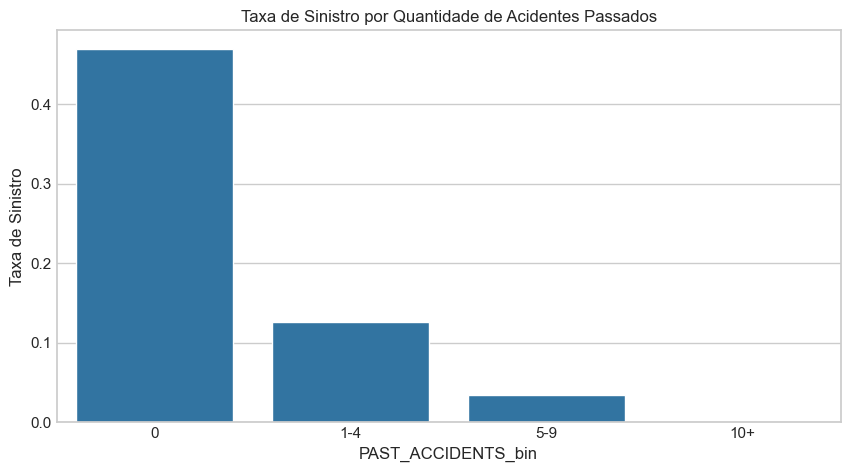

Observa-se um padrão contraintuitivo onde motoristas sem histórico de acidentes apresentam maior taxa de sinistro, enquanto grupos com múltiplos acidentes exibem risco menor, sugerindo possível efeito de sobrevivência, mudanças comportamentais ou viés amostral.


In [127]:
bins = [-1, 0, 4, 9, df['PAST_ACCIDENTS'].max()]
labels = ['0', '1-4', '5-9', '10+']

df['PAST_ACCIDENTS_bin'] = pd.cut(
    df['PAST_ACCIDENTS'],
    bins=bins,
    labels=labels
)

taxa_sinistro(df, 'PAST_ACCIDENTS_bin')

past_accidents_bin_risco = taxa_sinistro(df, 'PAST_ACCIDENTS_bin').reset_index()

plt.figure(figsize=(8,4))
sns.barplot(
    data=past_accidents_bin_risco,
    x='PAST_ACCIDENTS_bin',
    y='taxa_sinistro'
)

plt.ylabel('Taxa de Sinistro')
plt.xlabel('PAST_ACCIDENTS_bin')
plt.title('Taxa de Sinistro por Quantidade de Acidentes Passados')
plt.show()

print("Observa-se um padrão contraintuitivo onde motoristas sem histórico de acidentes apresentam maior taxa de sinistro, enquanto grupos com múltiplos acidentes exibem risco menor, sugerindo possível efeito de sobrevivência, mudanças comportamentais ou viés amostral.")

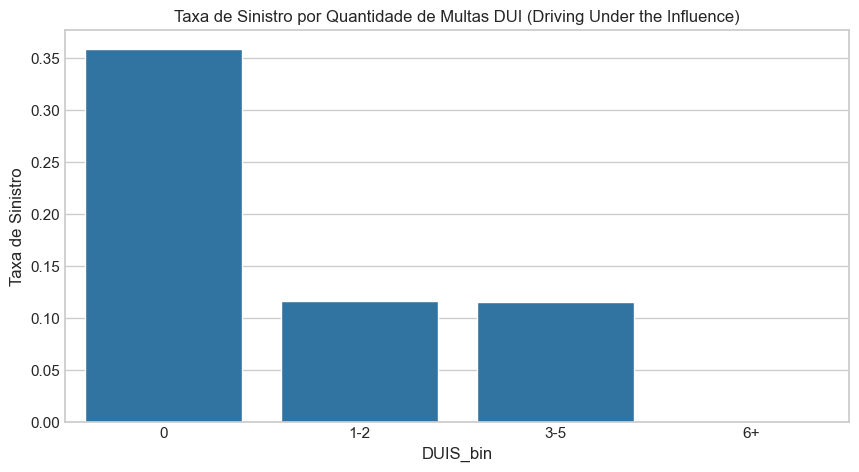

De forma semelhante a outras variáveis de histórico, motoristas sem registros de DUI apresentam maior taxa de sinistro, enquanto aqueles com histórico apresentam taxas menores, reforçando a necessidade de cautela na interpretação direta e investigação de efeitos comportamentais ou regulatórios.


In [132]:
bins = [-1, 0, 2, 4, df['DUIS'].max()]
labels = ['0', '1-2', '3-5', '6+']

df['DUIS_bin'] = pd.cut(
    df['DUIS'],
    bins=bins,
    labels=labels
)

taxa_sinistro(df, 'DUIS_bin')

duis_bin_risco = taxa_sinistro(df, 'DUIS_bin').reset_index()

plt.figure(figsize=(8,4))
sns.barplot(
    data=duis_bin_risco,
    x='DUIS_bin',
    y='taxa_sinistro'
)

plt.ylabel('Taxa de Sinistro')
plt.xlabel('DUIS_bin')
plt.title('Taxa de Sinistro por Quantidade de Multas DUI (Driving Under the Influence)')
plt.show()

print("De forma semelhante a outras variáveis de histórico, motoristas sem registros de DUI apresentam maior taxa de sinistro, enquanto aqueles com histórico apresentam taxas menores, reforçando a necessidade de cautela na interpretação direta e investigação de efeitos comportamentais ou regulatórios.")

<h1>INSIGHTS</h1>

In [160]:
age_risk = taxa_sinistro(df, 'AGE')
baseline = age_risk['taxa_sinistro'].min()
impact_pct = (age_risk['taxa_sinistro'] / baseline - 1) * 100
impact_pct

AGE
16-25    629.247651
26-39    242.081593
40-64     58.306004
65+        0.000000
Name: taxa_sinistro, dtype: float64

Taxa de sinistro aproximadamente 629% maior no grupo de 16-25 anos, quando comparada ao grupo de menor risco (65+ anos), indicando forte associação entre idade jovem e maior risco e suportando diferenciação de precificação por faixa etária.

In [171]:
df['GENDER_MARRIED'] = (
    df['GENDER'] + '_' +
    df['MARRIED'].map({1.0: 'Casado(a)', 0.0: 'Solteiro(a)'})
)

gender_married_risk = taxa_sinistro(df, 'GENDER_MARRIED')
gender_married_risk

baseline = gender_married_risk['taxa_sinistro'].min()
impact_pct = (gender_married_risk['taxa_sinistro'] / baseline - 1) * 100
impact_pct

GENDER_MARRIED
male_Solteiro(a)      251.510862
female_Solteiro(a)    181.700313
male_Casado(a)         77.992797
female_Casado(a)        0.000000
Name: taxa_sinistro, dtype: float64

Na análise combinada de gênero e estado civil, homens solteiros apresentam taxa de sinistro aproximadamente 2,5 vezes superior à observada no grupo de menor risco (mulheres casadas), evidenciando um efeito combinado dessas variáveis sobre o risco. Adicionalmente, dentro de cada gênero, indivíduos solteiros apresentam risco consistentemente superior aos casados, sugerindo que o estado civil atua como fator moderador do risco.

In [173]:
df['AGE_XP'] = (
    df['AGE'] + '_' +
    df['DRIVING_EXPERIENCE']
)

age_xp_risk = taxa_sinistro(df, 'AGE_XP')
age_xp_risk

baseline = age_xp_risk['taxa_sinistro'].min()
impact_pct = (age_xp_risk['taxa_sinistro'] / baseline - 1) * 100
impact_pct

AGE_XP
16-25_0-9y      3678.015873
26-39_0-9y      2934.319180
40-64_0-9y      2485.590994
65+_0-9y        1894.563758
26-39_10-19y    1310.033613
40-64_10-19y     796.081772
65+_10-19y       676.325301
40-64_20-29y     175.924903
65+_20-29y       139.090909
65+_30y+           0.000000
Name: taxa_sinistro, dtype: float64

Observa-se que motoristas jovens com baixa experiência concentram o maior risco: condutores de 16–25 anos com até 9 anos de experiência apresentam taxa de sinistro quase 2 vezes superior ao observado em motoristas de 65+ com a mesma experiência, evidenciando efeito amplificador da idade jovem sobre o risco inicial.  
Independentemente da idade, a taxa de sinistro decresce fortemente à medida que a experiência aumenta, indicando que anos de direção exercem papel mais determinante na redução do risco do que a idade isoladamente.  
Os resultados indicam que políticas de precificação baseadas apenas em idade tendem a superestimar o risco de condutores mais velhos e subestimar o risco de condutores jovens com baixa experiência, reforçando a necessidade de segmentação conjunta.

In [174]:
df['TYPE_YEAR'] = (
    df['VEHICLE_TYPE'] + '_' +
    df['VEHICLE_YEAR']
)

type_year_risk = taxa_sinistro(df, 'TYPE_YEAR')
type_year_risk

baseline = type_year_risk['taxa_sinistro'].min()
impact_pct = (type_year_risk['taxa_sinistro'] / baseline - 1) * 100
impact_pct

TYPE_YEAR
sedan_before 2015         284.816825
sports car_before 2015    267.984841
sports car_after 2015      34.861111
sedan_after 2015            0.000000
Name: taxa_sinistro, dtype: float64

Observa-se que o ano do veículo exerce influência substancialmente maior sobre a taxa de sinistro do que o tipo do veículo. Carros classificados como sedan e sports car apresentam taxas de sinistro bastante semelhantes quando pertencem à mesma faixa de ano.

In [175]:
df['INCOME_EDUCATION'] = (
    df['INCOME'] + '_' +
    df['EDUCATION']
)

income_education_risk = taxa_sinistro(df, 'INCOME_EDUCATION')
income_education_risk

baseline = income_education_risk['taxa_sinistro'].min()
impact_pct = (income_education_risk['taxa_sinistro'] / baseline - 1) * 100
impact_pct

INCOME_EDUCATION
poverty_high school          581.257299
poverty_university           558.762887
poverty_none                 550.050865
working class_university     458.637363
working class_high school    357.175214
working class_none           300.481859
middle class_university      239.922780
middle class_high school     159.044193
middle class_none            112.787213
upper class_university        45.212271
upper class_high school       20.038015
upper class_none               0.000000
Name: taxa_sinistro, dtype: float64

Observa-se uma relação monotônica decrescente entre renda e taxa de sinistro, independentemente do nível educacional. Indivíduos em situação de pobreza apresentam as maiores taxas de sinistro (≈550–580), enquanto indivíduos de alta renda exibem taxas substancialmente menores, evidenciando a renda como principal fator explicativo do risco nesse cruzamento

<h1>TRATAMENTO PRÉ IMPORTAÇÃO BI</h1>

Criação de categoria "Unknown" no lugar do missing de Credit Score.

In [203]:
df['CREDIT_SCORE_cat'] = df['CREDIT_SCORE'].astype(str)
df.loc[df['CREDIT_SCORE'].isna(), 'CREDIT_SCORE_cat'] = 'Unknown'

Input de mediana por grupo no lugar do missing de Annual Mileage.

In [204]:
df['ANNUAL_MILEAGE_imputed'] = df['ANNUAL_MILEAGE']

median_mileage_by_age = (
    df
    .groupby('AGE')['ANNUAL_MILEAGE']
    .median()
)

df['ANNUAL_MILEAGE_imputed'] = df.apply(
    lambda row: median_mileage_by_age[row['AGE']]
    if pd.isna(row['ANNUAL_MILEAGE'])
    else row['ANNUAL_MILEAGE'],
    axis=1
)

In [207]:
final_df = df.copy()

final_df.to_csv(
    'insurance_dashboard_final.csv',
    index=False
)